# Проект "Анализ бизнес-показателей для сервиса Яндекс Афиша"

>  # Цель проекта:
<b>Анализ бизнес-показателей для сервиса Яндекс Афиша</b> 

> # Задачи проекта:
- Загрузить библиотеки,необходимые для проведения исследования.
- Загрузить датасеты с информацией о визитах, заказах и рекламных расходах.
- Провести первичный анализ данных. Провести предобработку данных.
- Сформулировать промежуточные выводы.
- Рассчитать продуктовые метрики, метрики электронной коммерции, маркетинговые метрики.
- Построить графики, соответствующие метрикам, провести когортный анализ.
- Сформулировать промежуточные выводы.
- Сформулировать окончательные выводы, дать рекомендации, выделить наиболее перспективные для компании когорты клиентов.


# Оглавление:
- <a id='1'>Импорт библиотек</a>
- <a id='6'>Проверка дубликатов</a>
- <a id='10'>Изменение регистра в названии столбцов</a>
- <a id='11'>Предобработка датасетов</a>
- <a id='25'>Промежуточные выводы</a>
- <a id='26'>Рассчет DAU, WAU, MAU</a>
- <a id='34'>Промежуточные выводы</a>
- <a id='35'>Определение количества сессий за день</a>
- <a id='36'>Промежуточные выводы</a>
- <a id='37'>Определение длительности пользовательской сессии</a>
- <a id='44'>Промежуточные выводы</a>
- <a id='45'>Рассчет Retention Rate. Когортный анализ</a>
- <a id='58'>Промежуточные выводы</a>
- <a id='59'>Cколько времени в среднем проходит с момента первого посещения сайта до совершения покупки?</a>
- <a id='69'>Промежуточные выводы</a>
- <a id='70'>Рассчет среднего количества покупок на одного покупателя за определённый период (шесть месяцев)</a>
- <a id='80'>Промежуточные выводы</a>
- <a id='81'>Рассчет среднего чека методом группировки по времени совершения покупки</a>
- <a id='88'>Промежуточные выводы</a>
- <a id='89'>Рассчет LTV покупателя по когортам</a>
- <a id='106'>Промежуточные выводы</a>
- <a id='107'>Рассчет общей суммы расходов на маркетинг/ Распределение расходов по источникам/Распределение расходов по времени (по месяцам)</a>
- <a id='114'>Промежуточные выводы</a>
- <a id='115'>Рассчет средней стоимости привлечения клиента (CAC)</a>
- <a id='123'>Промежуточные выводы</a>
- <a id='124'>Рассчет ROMI</a>
- <a id='155'>Рассчет ROI (рассчет, не предусмотренный заданием проекта)</a>
- <a id='159'>Промежуточные выводы</a>
- <a id='159'>Окончательные выводы. Рекомендации</a>



___

## Предобработка данных

### Импорт библиотек. Чтение датасетов

In [1]:
#Импортируем библиотеки для дальнейшего анализа
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# Читаем датасеты
visits=pd.read_csv('/Users/denisbogomolov/Documents/Data_Analysis/visits_log.csv')
orders=pd.read_csv('/Users/denisbogomolov/Documents/Data_Analysis/orders_log.csv')
costs=pd.read_csv('/Users/denisbogomolov/Documents/Data_Analysis/costs.csv')

In [3]:
# Выводим датасет visits методом .sample()
visits.sample(10)

,Device,End Ts,Source Id,Start Ts,Uid
74583,desktop,2018-03-25 15:38:00,3,2018-03-25 15:32:00,15784878250951077250
180861,touch,2017-10-29 17:29:00,4,2017-10-29 16:54:00,14783167746494817041
273306,desktop,2017-06-19 22:33:00,3,2017-06-19 22:28:00,180417938936354812
71928,desktop,2017-09-29 15:13:00,3,2017-09-29 14:48:00,1128598215107526173
122556,touch,2018-01-30 22:19:00,5,2018-01-30 22:16:00,5106504005781783972
317320,desktop,2017-10-29 21:37:00,3,2017-10-29 21:25:00,9536919144766340828
71976,desktop,2017-06-13 12:03:00,1,2017-06-13 12:03:00,1186757012633220834
348277,touch,2017-10-01 05:27:00,3,2017-10-01 05:25:00,1464119971023021533
314480,desktop,2018-04-11 22:46:00,5,2018-04-11 22:44:00,13096229803459165591
216645,touch,2017-07-27 19:50:00,5,2017-07-27 19:47:00,11165937359436057965


In [4]:
# Выводим датасет orders методом .sample()
orders.sample(10)

,Buy Ts,Revenue,Uid
35563,2018-02-18 18:25:00,1.77,13230931016951340194
19836,2017-11-24 23:09:00,5.84,14739561006343075124
12277,2017-10-11 22:42:00,0.30,11845867950434766711
31582,2018-01-29 11:58:00,5.55,2826168963780356394
41036,2018-03-21 21:17:00,12.83,1554134738398159899
16784,2017-11-09 13:08:00,4.28,17476065477084499121
9943,2017-10-01 12:31:00,3.67,15714641467440266926
21338,2017-12-01 14:31:00,0.06,15094388428955080017
44467,2018-04-18 07:33:00,4.89,5186249132481774042
31181,2018-01-26 15:04:00,9.78,15513225177094587535


In [5]:
# Выводим датасет costs методом .sample()
costs.sample(10)

,source_id,dt,costs
2041,9,2018-01-12,21.90
1481,5,2017-06-30,77.88
2295,10,2017-09-25,24.27
849,3,2017-10-02,558.33
2533,10,2018-05-23,7.42
1468,5,2017-06-17,63.85
2368,10,2017-12-07,27.93
1834,9,2017-06-19,9.57
689,2,2018-04-25,138.46
519,2,2017-11-04,134.45


In [6]:
# Пишем функцию для вывода info() и проверки дубликатов
def info (dataframe):
    print (dataframe.info())
    print()
    print ('Duplicates:',dataframe.duplicated().sum())

In [7]:
info(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

Duplicates: 0


In [8]:
info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

Duplicates: 0


In [9]:
info(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None

Duplicates: 0


<b>Важно: дубликаты в датасетах отсуствуют, данные в порядке.</b>

___

### Изменение регистра в названии столбцов датасетов

In [10]:
# Пишем функцию для автоматизации рутинных действий с датасетами
def prop_col (dataframe):
    print (dataframe.columns.to_list())
    print (dataframe.columns.str.lower())

___

### Предобработка датасета "visits"

In [11]:
# Применяем функцию prop_col
prop_col(visits)

['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid']
Index(['device', 'end ts', 'source id', 'start ts', 'uid'], dtype='object')


In [12]:
# Переименовываем столбцы
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [13]:
# Изменяем порядок столбцов
visits = visits[['device', 'source_id', 'uid', 'start_ts', 'end_ts']]

In [14]:
# Приводим столбцы 'start_ts'и 'end_ts' к нужному формату даты
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')

In [15]:
# Проверяем результат
visits.head(5)

,device,source_id,uid,start_ts,end_ts
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00
4,desktop,3,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00


___

### Предобработка датасета "orders"

In [16]:
# Применяем функцию prop_col
prop_col(orders)

['Buy Ts', 'Revenue', 'Uid']
Index(['buy ts', 'revenue', 'uid'], dtype='object')


In [17]:
# Переименовываем столбцы
orders.columns= ['purchase_ts', 'revenue', 'uid']

In [18]:
# Изменяем порядок столбцов в датасете
orders=orders[['uid', 'revenue','purchase_ts']]

In [19]:
# Приводим столбец 'purchase_ts' к нужному формату даты
orders['purchase_ts'] = pd.to_datetime(orders['purchase_ts'], format = '%Y-%m-%d %H:%M:%S')

In [20]:
# Проверяем результат
orders.head(5)

,uid,revenue,purchase_ts
0,10329302124590727494,17.00,2017-06-01 00:10:00
1,11627257723692907447,0.55,2017-06-01 00:25:00
2,17903680561304213844,0.37,2017-06-01 00:27:00
3,16109239769442553005,0.55,2017-06-01 00:29:00
4,14200605875248379450,0.37,2017-06-01 07:58:00


___

### Предобработка датасета "costs"

In [21]:
# Применяем функцию prop_col
prop_col(costs)

['source_id', 'dt', 'costs']
Index(['source_id', 'dt', 'costs'], dtype='object')


In [22]:
# Переименовываем столбцы
costs.columns= ['source_id', 'date', 'costs']

In [23]:
# Изменяем порядок столбцов в датасете
costs=costs[['source_id', 'costs', 'date']]

In [24]:
# Приводим столбец 'date' к нужному формату даты
costs['date'] = pd.to_datetime(costs['date'], format = '%Y-%m-%d')

In [25]:
# Проверяем результат
costs.head(5)

,source_id,costs,date
0,1,75.20,2017-06-01
1,1,62.25,2017-06-02
2,1,36.53,2017-06-03
3,1,55.00,2017-06-04
4,1,57.08,2017-06-05


### Промежуточные выводы:
- Датасеты прочитаны.
- Дубликаты отсутствуют, исходные данные в порядке.
- Названия столбцов переведены в нижний регистр.
- Столбцы переименованы.
- Порядок столбцов в датасетах изменен.
- Датасеты подготовлены для дальнейшего анализа.
- Данные в столбцах 'revenue' и 'costs' не приводились к определенному формату, поскольку в задании указано, что это - условные единицы (у.е.).

___

## Рассчет метрик. Проведение анализа

### Рассчет продуктовых метрик

In [26]:
warnings.filterwarnings('ignore')

In [27]:
# Добавляем новые столбцы в датасет 'visits'
visits['date'] = visits['start_ts'].dt.date
visits['day_num'] = visits['start_ts'].dt.day
visits['week_num'] = visits['start_ts'].dt.week
visits['month'] = visits['start_ts'].dt.month
visits['year'] = visits['start_ts'].dt.year

In [28]:
# Проверяем результат добавления
visits.head(5)

,device,source_id,uid,start_ts,end_ts,date,day_num,week_num,month,year
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,20,51,12,2017
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,19,8,2,2018
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,1,26,7,2017
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,20,20,5,2018
4,desktop,3,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-27,27,52,12,2017


In [29]:
# Напишем, в общем, не обязательную в данном случае, функцию для автоматизации вывода продуктовых метрик 
def prod_met (dataframe):
    dau = visits.groupby('date').agg({'uid': 'nunique'}).mean()
    print('Ежедневных посещений (DAU):', int(dau), 'человек')
    wau = visits.groupby('week_num').agg({'uid': 'nunique'}).mean()
    print('Еженедельных посещений (WAU):', int(wau), 'человек')
    mau = visits.groupby('month').agg({'uid': 'nunique'}).mean()
    print('Ежемесячных посещений (MAU):',int(mau), 'человек')
    ann_visits=visits.groupby('year').agg({'uid':'nunique'}).mean()
    print('Среднее количество посещений в год:', int(ann_visits), 'человек')

In [30]:
# Выводим функцию
prod_met(visits)

Ежедневных посещений (DAU): 907 человек
Еженедельных посещений (WAU): 5825 человек
Ежемесячных посещений (MAU): 23228 человек
Среднее количество посещений в год: 122156 человек


In [31]:
# Формируем данные для графиков
dau = visits.groupby('date').agg({'uid': 'nunique'})

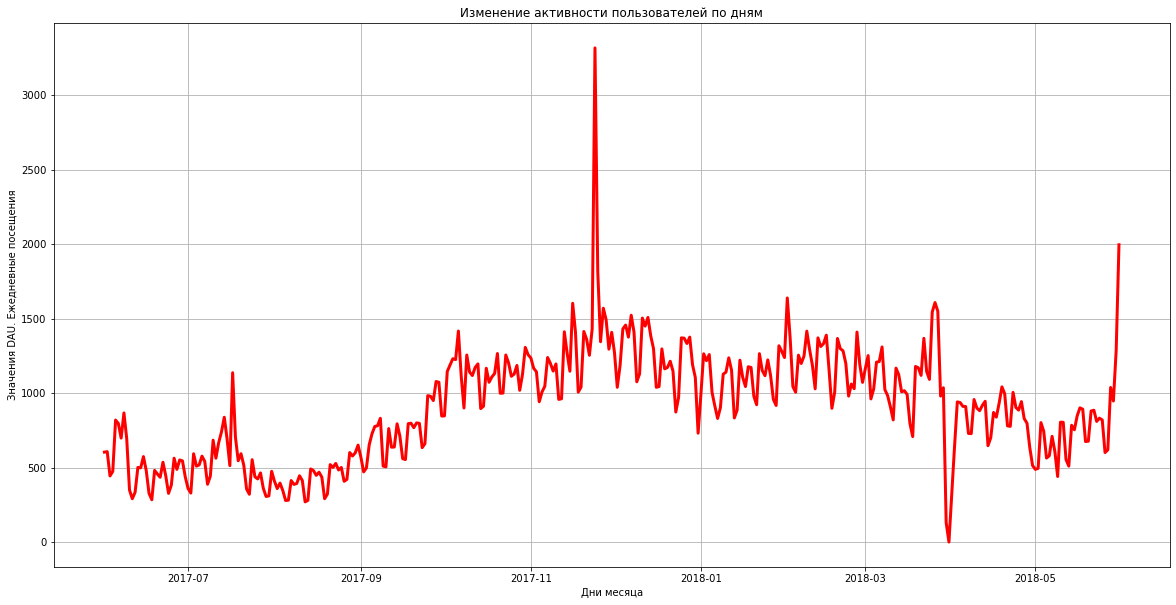

In [32]:
# Строим график для DAU
dau.plot(color='red',figsize=(20,10), grid=True, legend=False, linewidth=3)
plt.title('Изменение активности пользователей по дням')
plt.xlabel ('Дни месяца')
plt. ylabel ('Значения DAU. Ежедневные посещения')
plt.show()

In [33]:
# Находим количество пользователей за неделю, приводим в соответствующий формат
visits['week_vis']=visits['start_ts'].astype('datetime64[W]')

In [34]:
# Выводим результат
visits. sample(5)

,device,source_id,uid,start_ts,end_ts,date,day_num,week_num,month,year,week_vis
212046,desktop,4,10416933579096194441,2017-09-05 15:32:00,2017-09-05 15:42:00,2017-09-05,5,36,9,2017,2017-08-31
328786,desktop,9,7515731324421717689,2018-03-27 11:58:00,2018-03-27 12:07:00,2018-03-27,27,13,3,2018,2018-03-22
3210,desktop,5,4880606642790696589,2018-03-26 10:34:00,2018-03-26 10:37:00,2018-03-26,26,13,3,2018,2018-03-22
273772,touch,4,1788621539560023737,2017-12-24 22:23:00,2017-12-24 22:25:00,2017-12-24,24,51,12,2017,2017-12-21
228715,desktop,5,13787176942672900011,2017-08-16 10:22:00,2017-08-16 10:26:00,2017-08-16,16,33,8,2017,2017-08-10


In [35]:
warnings.filterwarnings('ignore')

In [36]:
# Группируем по новому столбцу
wau=visits.groupby('week_vis')['start_ts'].agg([('uid','nunique')])

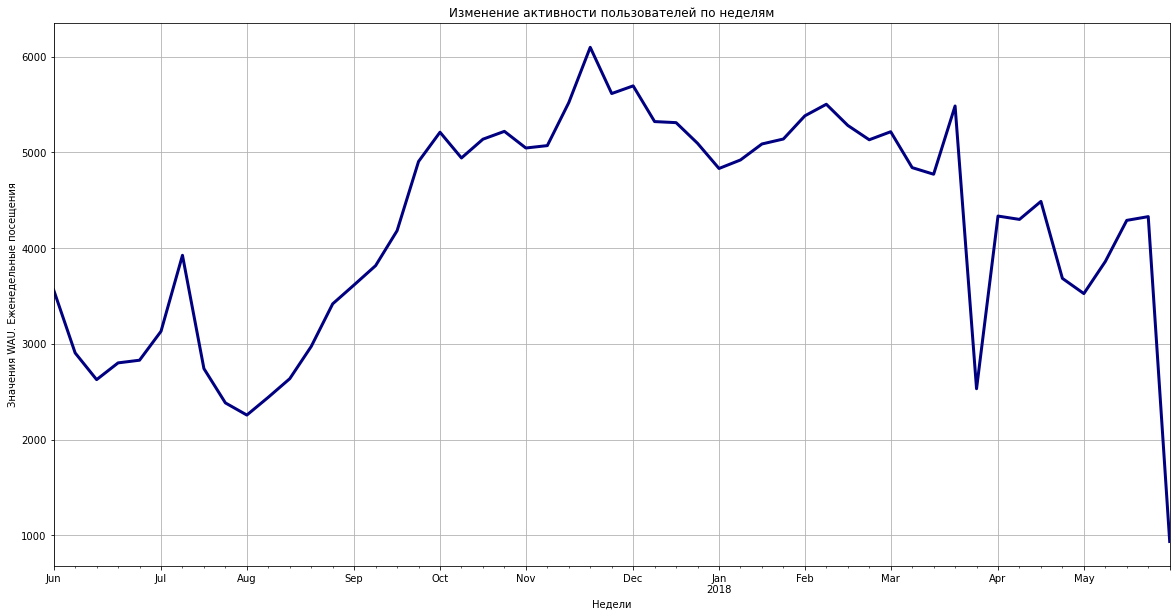

In [37]:
# Строим график для WAU
wau.plot(color='navy',figsize=(20,10), grid=True, legend=False, linewidth=3)
plt.title('Изменение активности пользователей по неделям')
plt.xlabel ('Недели')
plt. ylabel ('Значения WAU. Еженедельные посещения')
plt.show()

In [38]:
# Находим количество пользователей за месяц, приводим в соответствующий формат
visits['month_vis']=visits['start_ts'].astype('datetime64[M]')

In [39]:
# Выводим результат
visits. sample(5)

,device,source_id,uid,start_ts,end_ts,date,day_num,week_num,month,year,week_vis,month_vis
65880,desktop,5,12320151218388566656,2018-04-22 18:42:00,2018-04-22 19:05:00,2018-04-22,22,16,4,2018,2018-04-19,2018-04-01
289764,desktop,3,1314973987025214264,2017-12-20 20:17:00,2017-12-20 20:20:00,2017-12-20,20,51,12,2017,2017-12-14,2017-12-01
95553,touch,3,3709955756226705140,2017-10-24 21:55:00,2017-10-24 22:01:00,2017-10-24,24,43,10,2017,2017-10-19,2017-10-01
176178,desktop,1,17030528792926543083,2017-12-21 10:50:00,2017-12-21 11:38:00,2017-12-21,21,51,12,2017,2017-12-21,2017-12-01
141442,desktop,4,15359328034031157887,2017-08-30 16:20:00,2017-08-30 16:25:00,2017-08-30,30,35,8,2017,2017-08-24,2017-08-01


In [40]:
# Группируем по новому столбцу
mau=visits.groupby('month_vis')['start_ts'].agg([('uid','nunique')])

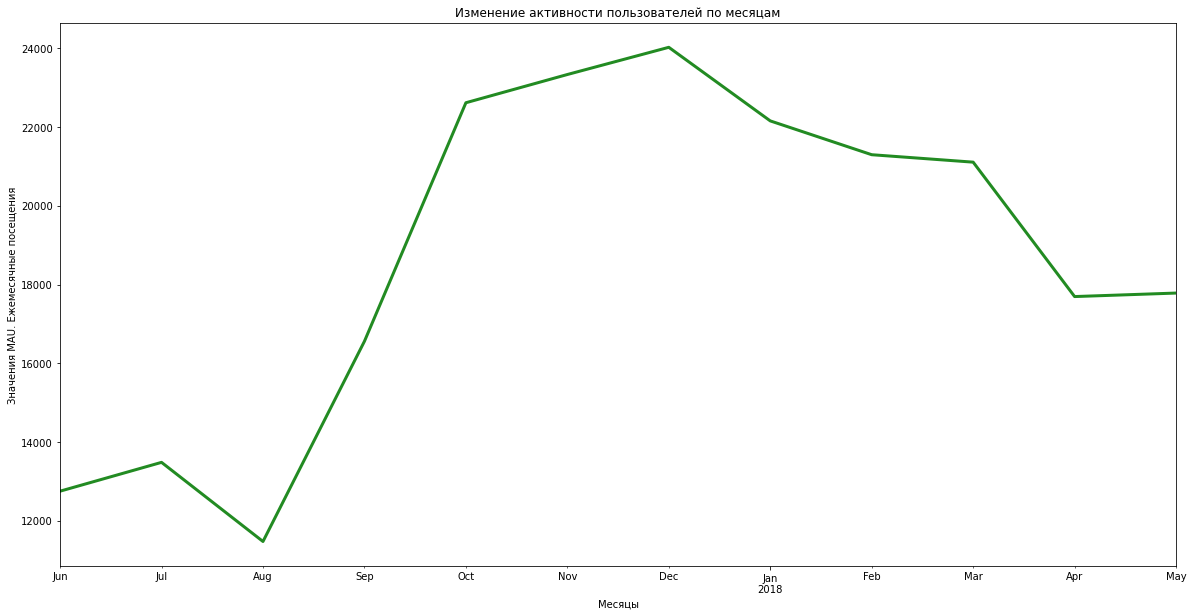

In [41]:
# Строим график для MAU
mau.plot(color='forestgreen',figsize=(20,10), grid=False, legend=False, linewidth=3)
plt.title('Изменение активности пользователей по месяцам')
plt.xlabel ('Месяцы')
plt. ylabel ('Значения MAU. Ежемесячные посещения')
plt.show()

### Промежуточные выводы:
- Пик ежедневных посещений приходится на 24 - 25 число каждого месяца. Применительно к сервису это можно трактовать следующим образом: в конце месяца (если позволяют финансы), люди покупают билеты на различные мероприятия в текущем месяце, либо приобретают билеты на следующий месяц. Тут, кстати, можно посоветовать следующее: ближе к концу каждого месяца предлагать некие скидки, которые могут привлечь еще больше посетителей.
- Пик еженедельных посещений приходится на середину декабря. Во-первых, это сезон детских новогодних елок, во-вторых, это - различные предновогодние премьеры, а в-третьих, люди покупают билеты на будущие мероприятия в качестве подарков. Кроме того, есть пики в феврале и марте (видимо, подарки к 8 марта), а также пик на первой неделе июля - билеты на музыкальные фестивали. 
- Пик ежемесячных посещений аналогичен пику еженедельных посещений. Особо примечательна ситуация в ноябре - декабре - именно в эти месяцы люди начинают покупать билеты на конец декабря и на новогодние каникулы.
- Провал по посещениям - август, пора отпусков, затишье. Кроме того, сильный провал наблюдается в апреле и мае. Можно предположить, в эти месяцы большинство озабочены но походами в театр/кино/музей, а рассадой на дачах.

### Определение количества сессий  за день

In [42]:
# Определяем среднее количество сессий за день
sess_count = visits.groupby('date').agg({'uid': 'count'}).mean()
print("Количество сессий в день:", int(sess_count))

Количество сессий в день: 987


In [43]:
# Вычисляем количество уникальных пользователей за день
dau = visits.groupby('date').agg({'uid': 'nunique'}).mean()
print('Среднее количество уникальных пользователей в день:', int(dau))

Среднее количество уникальных пользователей в день: 907


In [44]:
# Вычисляем количество сессий на одного пользователя
sess_per_user=(sess_count/dau).mean()
print('Среднее количество сессий на одного пользователя:', int(sess_per_user))

Среднее количество сессий на одного пользователя: 1


### Промежуточные выводы:
- DAU - 907 человек, количество сессий в день - 987.
- На одного пользователя, в среднем, приходится 1 сессия в день.


### Определение длительности пользовательской сессии

In [45]:
# Формируем новый столбец, рассчитываем длительность сессии
visits['sess_duration']= (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60

In [46]:
# Выведем результат
visits.sample(10)

,device,source_id,uid,start_ts,end_ts,date,day_num,week_num,month,year,week_vis,month_vis,sess_duration
234120,desktop,4,15503993306406597502,2018-03-06 11:43:00,2018-03-06 11:43:00,2018-03-06,6,10,3,2018,2018-03-01,2018-03-01,0.000000
359050,desktop,1,11130614128999469135,2017-12-30 12:31:00,2017-12-30 12:31:19,2017-12-30,30,52,12,2017,2017-12-28,2017-12-01,0.316667
85941,desktop,2,2283642841729482577,2017-11-02 16:40:00,2017-11-02 16:43:00,2017-11-02,2,44,11,2017,2017-11-02,2017-11-01,3.000000
216736,desktop,10,8409097599304118972,2017-10-04 02:49:00,2017-10-04 02:51:00,2017-10-04,4,40,10,2017,2017-09-28,2017-10-01,2.000000
257535,desktop,5,2373634799544386842,2017-08-30 18:07:00,2017-08-30 18:10:00,2017-08-30,30,35,8,2017,2017-08-24,2017-08-01,3.000000
198688,touch,4,1727357699736502932,2018-05-11 22:28:00,2018-05-11 22:32:00,2018-05-11,11,19,5,2018,2018-05-10,2018-05-01,4.000000
106079,touch,4,15735955096114354583,2017-12-31 18:54:00,2017-12-31 19:01:00,2017-12-31,31,52,12,2017,2017-12-28,2017-12-01,7.000000
321361,touch,4,16080068170315517299,2017-12-10 20:14:00,2017-12-10 20:15:00,2017-12-10,10,49,12,2017,2017-12-07,2017-12-01,1.000000
287774,desktop,5,13327493021828481391,2017-06-26 20:09:00,2017-06-26 20:28:00,2017-06-26,26,26,6,2017,2017-06-22,2017-06-01,19.000000
327373,touch,3,4794974719233861595,2017-12-23 14:42:00,2017-12-23 14:47:00,2017-12-23,23,51,12,2017,2017-12-21,2017-12-01,5.000000


In [47]:
# Выведем описательные статистики столбца 'sess_duration'
visits['sess_duration'].describe()

count    359400.000000
mean         10.717095
std          16.618796
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: sess_duration, dtype: float64

<b>Важно: есть отрицательные значения! Необходимо оценить их количество в популяции. </b>

In [48]:
# Приводим данные к целочисленному виду
visits['sess_duration']=visits['sess_duration'].astype(int)

In [49]:
# Выводим отсортированные уникальные значения столбца
print(sorted(visits['sess_duration'].unique()))

[-46, -32, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 222, 224,

<b>Важно: во всей популяции два отрицательных значения сессии. Это значит, что, фактически, сессия закончилась раньше, чем началась. Очевидно, это технический баг. Данные значения стоит удалить из популяции.</b>

In [50]:
# Удаляем отрицательные значения
visits=visits.query('sess_duration>=0')

In [51]:
# Добавляем моду
visits['sess_duration'].mode()

0    1
dtype: int64

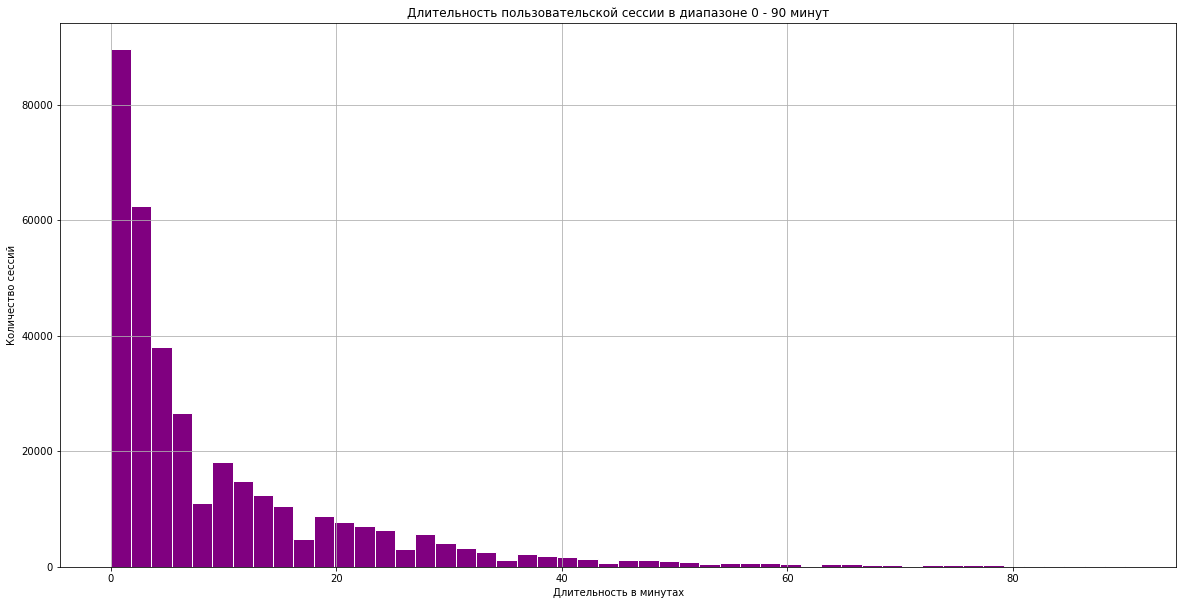

In [52]:
# Выводим распределение длительности пользовательских сессий
visits['sess_duration'].plot(kind='hist', bins=50, range=(0,90), 
                             color='purple', ec='white', figsize=(20,10), grid=True)
plt.title('Длительность пользовательской сессии в диапазоне 0 - 90 минут')
plt.xlabel('Длительность в минутах')
plt.ylabel('Количество сессий')
plt.show()

### Промежуточные выводы:
- Средняя продолжительность сессии - 10 минут.
- Медианное время - 5 минут.
- Мода по продолжительности сессии - 1 минута.
- График распределения длительности показывает, что большинство пользователей ресурса задерживается на сайте менее 2 минут за одну сессию (1.8 минуты).

### Рассчет Retention Rate. Когортный анализ

In [53]:
# Группируем данные по столбцу 'uid'
# Получаем дату первого визита каждого клиента
first_visits=visits.groupby('uid')['start_ts'].min()

In [54]:
# Выводим результат
first_visits.head(5)

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: start_ts, dtype: datetime64[ns]

In [55]:
# Изменяем имя столбца в Series
first_visits.name='first_start_ts'

In [56]:
# Объединяем датасет visits и Series по столбцу 'uid'
visits=visits.join(first_visits, on='uid')

In [57]:
# Выводим результат объединения
visits.head(10)

,device,source_id,uid,start_ts,end_ts,date,day_num,week_num,month,year,week_vis,month_vis,sess_duration,first_start_ts
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,20,51,12,2017,2017-12-14,2017-12-01,18,2017-12-20 17:20:00
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,19,8,2,2018,2018-02-15,2018-02-01,28,2018-02-19 16:53:00
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,1,26,7,2017,2017-06-29,2017-07-01,0,2017-07-01 01:54:00
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,20,20,5,2018,2018-05-17,2018-05-01,24,2018-03-09 20:05:00
4,desktop,3,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-27,27,52,12,2017,2017-12-21,2017-12-01,0,2017-12-27 14:06:00
5,desktop,5,16007536194108375387,2017-09-03 21:35:00,2017-09-03 21:36:00,2017-09-03,3,35,9,2017,2017-08-31,2017-09-01,1,2017-09-03 21:35:00
6,desktop,1,6661610529277171451,2018-01-30 11:13:00,2018-01-30 12:09:00,2018-01-30,30,5,1,2018,2018-01-25,2018-01-01,56,2017-06-29 09:00:00
7,touch,3,11423865690854540312,2017-11-05 15:14:00,2017-11-05 15:15:00,2017-11-05,5,44,11,2017,2017-11-02,2017-11-01,1,2017-11-05 15:14:00
8,desktop,3,2987360259350925644,2017-07-19 10:41:00,2017-07-19 10:44:00,2017-07-19,19,29,7,2017,2017-07-13,2017-07-01,3,2017-07-19 10:41:00
9,desktop,5,1289240080042562063,2017-11-08 13:42:00,2017-11-08 13:43:00,2017-11-08,8,45,11,2017,2017-11-02,2017-11-01,1,2017-11-08 13:42:00


In [58]:
# Выделяем из столбца месяцы и приводим значения столбца к типу 'datetime64[M]'
visits['first_visit_month']=visits['first_start_ts'].astype('datetime64[M]')

In [59]:
# Выделяем из столбца месяцы и приводим значения столбца к типу 'datetime64[M]'
visits['visit_month']=visits['start_ts'].astype('datetime64[M]')

In [60]:
# Выводим результат
visits.head(10)

,device,source_id,uid,start_ts,end_ts,date,day_num,week_num,month,year,week_vis,month_vis,sess_duration,first_start_ts,first_visit_month,visit_month
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,20,51,12,2017,2017-12-14,2017-12-01,18,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,19,8,2,2018,2018-02-15,2018-02-01,28,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,1,26,7,2017,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,20,20,5,2018,2018-05-17,2018-05-01,24,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,desktop,3,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-27,27,52,12,2017,2017-12-21,2017-12-01,0,2017-12-27 14:06:00,2017-12-01,2017-12-01
5,desktop,5,16007536194108375387,2017-09-03 21:35:00,2017-09-03 21:36:00,2017-09-03,3,35,9,2017,2017-08-31,2017-09-01,1,2017-09-03 21:35:00,2017-09-01,2017-09-01
6,desktop,1,6661610529277171451,2018-01-30 11:13:00,2018-01-30 12:09:00,2018-01-30,30,5,1,2018,2018-01-25,2018-01-01,56,2017-06-29 09:00:00,2017-06-01,2018-01-01
7,touch,3,11423865690854540312,2017-11-05 15:14:00,2017-11-05 15:15:00,2017-11-05,5,44,11,2017,2017-11-02,2017-11-01,1,2017-11-05 15:14:00,2017-11-01,2017-11-01
8,desktop,3,2987360259350925644,2017-07-19 10:41:00,2017-07-19 10:44:00,2017-07-19,19,29,7,2017,2017-07-13,2017-07-01,3,2017-07-19 10:41:00,2017-07-01,2017-07-01
9,desktop,5,1289240080042562063,2017-11-08 13:42:00,2017-11-08 13:43:00,2017-11-08,8,45,11,2017,2017-11-02,2017-11-01,1,2017-11-08 13:42:00,2017-11-01,2017-11-01


In [61]:
# Рассчитываем lifetime в рамках когорты; применяем константу np.timedelta64(1,'M')
# Округляем результаты и приводим к целочисленым значениям
visits['lifetime'] = (visits['visit_month'] - visits['first_visit_month']) / np.timedelta64(1, 'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')

In [62]:
# Группируем данные по когорте. Подсчитываем количество активных пользователей для каждой когорты за "месяц жизни"
# Находим исходное число пользователей в когорте. Берем их число на нулевом месяце
# Формируем новые столбцы
# Выводим результат
cohort_visits = visits.groupby(['first_visit_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()
first_uid = cohort_visits[cohort_visits['lifetime'] == 0][['first_visit_month', 'uid']]
first_uid.columns = ['first_visit_month', 'first_uid']
first_uid.head(10)

,first_visit_month,first_uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [63]:
# Объединяем данные по когортам с исходным количеством пользователей в когорте
cohort_visits = cohort_visits.merge(first_uid)

In [64]:
# Рассчитываем Retention Rate
# Формируем сводную таблицу
cohort_visits['retention'] = cohort_visits['uid'] / cohort_visits['first_uid']
visits_retention_pivot = cohort_visits.pivot_table(index = 'first_visit_month', 
                                                   columns = 'lifetime', values = 'retention', aggfunc = 'sum')

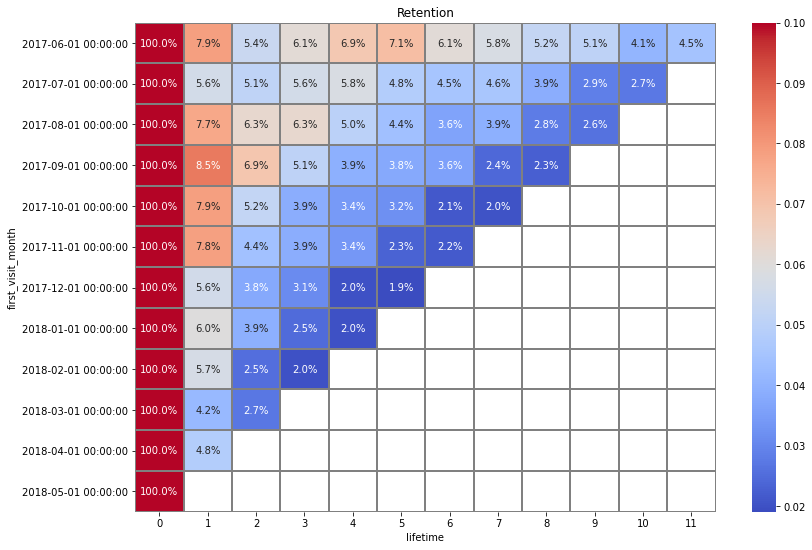

In [65]:
# Создаем тепловую карту
plt.figure(figsize=(13, 9))
plt.title('Retention')
ax=sns.heatmap(visits_retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='grey',cmap='coolwarm',
                vmax=0.1)
ax.set_yticklabels(visits_retention_pivot.index)
plt.show()

In [66]:
# Находим средний Retention Rate на второй месяц «жизни» когорт
visits_retention_pivot.mean()*100

lifetime
0     100.000000
1       6.516660
2       4.633262
3       4.275990
4       4.059457
5       3.944383
6       3.695659
7       3.750912
8       3.546465
9       3.515906
10      3.406250
11      4.495060
dtype: float64

In [67]:
# Делаем выборку по средним значениям
visits_retention_pivot.loc['mean'] = visits_retention_pivot.mean()

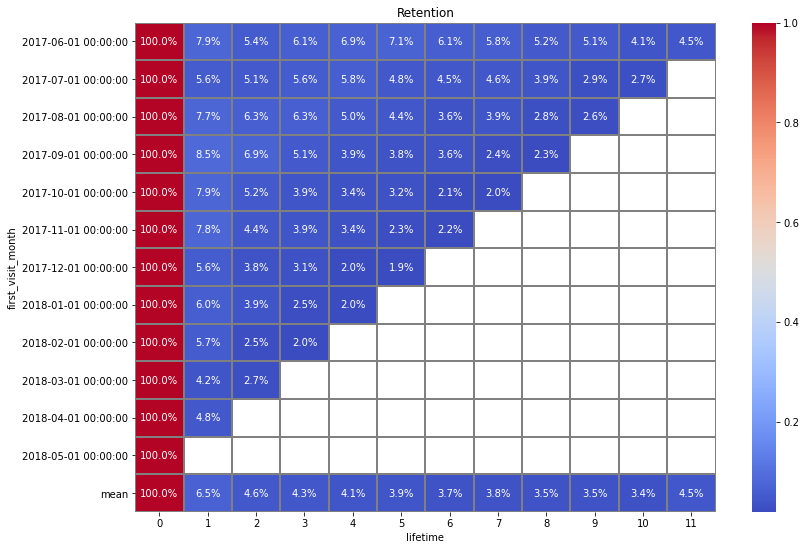

In [68]:
# Создаем тепловую карту. Второй вариант с выборкой по средним значениям
plt.figure(figsize=(13, 9))
plt.title('Retention')
ax=sns.heatmap(visits_retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='grey',cmap='coolwarm',)
ax.set_yticklabels(visits_retention_pivot.index)
plt.show()

### Промежуточные выводы:
- Тепловая карта показывает, что Retention пользователей довольно низок.
- Максимальное значение удержания - второй месяц "жизни" когорт.
- Максимальное значение Retention демонстрирует когорта сентября 2017 года (8,5%).
- Июньская когорта 2017 года, по сравнению со всеми остальными когортами, демонстрирует относительно высокий уровень удержания по месяцам.
- Средний Retention Rate на второй месяц «жизни» когорт - 6,5%

___

### Рассчет метрик электронной коммерции

### Cколько времени в среднем проходит с момента первого посещения сайта до совершения покупки?

In [69]:
# Группируем данные по столбцу 'uid'в датасете visits
# Переименовываем столбец 'start_ts'
# Сбрасываем индекс
in_visit = visits.groupby('uid').agg({'start_ts':'min'}).rename(columns={'start_ts':'in_visit_date'}).\
reset_index()

In [70]:
# Группируем данные по столбцу 'uid'в датасете orders
# Переименовываем столбец 'purchase_ts'
# Сбрасываем индекс
in_order = orders.groupby('uid').agg({'purchase_ts':'min'}).rename(columns={'purchase_ts':'in_purchase_date'})\
.reset_index()

In [71]:
# Формируем объединенную таблицу
fp_time=in_visit.merge(in_order,on='uid', how='inner')

In [72]:
# Выводим результат
fp_time.sample(5)

,uid,in_visit_date,in_purchase_date
10222,5144819356434972483,2017-10-29 09:09:00,2017-10-29 09:18:00
15154,7616096528811135102,2018-01-20 11:50:00,2018-05-12 14:22:00
9300,4699372290764583196,2017-07-11 08:41:00,2018-02-03 17:57:00
19754,9972244973116722371,2018-03-19 15:54:00,2018-03-19 15:59:00
1918,992848365869589259,2017-11-21 19:27:00,2017-11-21 20:44:00


In [73]:
# Создаем новый столбец и рассчитываем время с момента первого посещения до момента первой покупки
fp_time['dec_time']= fp_time['in_purchase_date'] - fp_time['in_visit_date']
fp_time['dec_time'] = fp_time['dec_time']/np.timedelta64(1, 'm')
fp_time['dec_time'] = fp_time['dec_time'].round(1)

In [74]:
# Выводим результат
fp_time.sample(5)

,uid,in_visit_date,in_purchase_date,dec_time
8698,4382393620979121336,2017-10-06 22:08:00,2017-10-06 22:19:00,11.0
505,256209601571571435,2017-12-06 11:44:00,2017-12-06 12:37:00,53.0
17191,8652559851304579868,2018-03-15 11:50:00,2018-03-19 14:43:00,5933.0
10516,5293269732830318200,2017-11-16 14:51:00,2017-11-16 14:54:00,3.0
12437,6211656385309534255,2017-12-29 13:31:00,2017-12-29 13:32:00,1.0


In [75]:
# Выводим медиану по столбцу 'dec_time'
fp_time['dec_time'].median()

16.0

In [76]:
# Проводим группировку по пользователям и по минимальному временному лагу
time_hist = fp_time.groupby('uid')[['dec_time']].min()

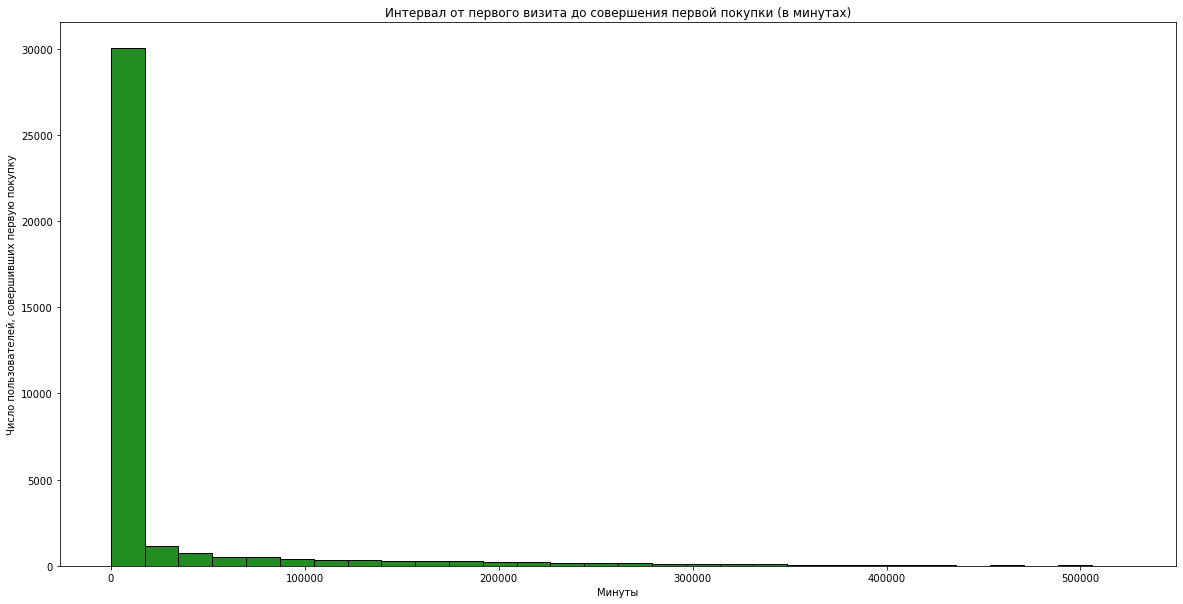

In [77]:
# Формируем  гистограмму распределения
time_hist.plot(kind='hist', bins=30, figsize=(20,10), color='forestgreen', ec='black', legend=False)
plt.title('Интервал от первого визита до совершения первой покупки (в минутах)')
plt.xlabel ('Минуты')
plt.ylabel ('Число пользователей, совершивших первую покупку')
plt.show()

Гистограмма в таком виде мало информативна. Очевидно, что большая часть пользователей не совершает покупки (даже первую) в течение десятков часов. Есть смысл ограничить интервал времени одним часом (60 минут).

In [78]:
# Делаем срез по времени
fp_time_hist=time_hist.query('dec_time <=60')

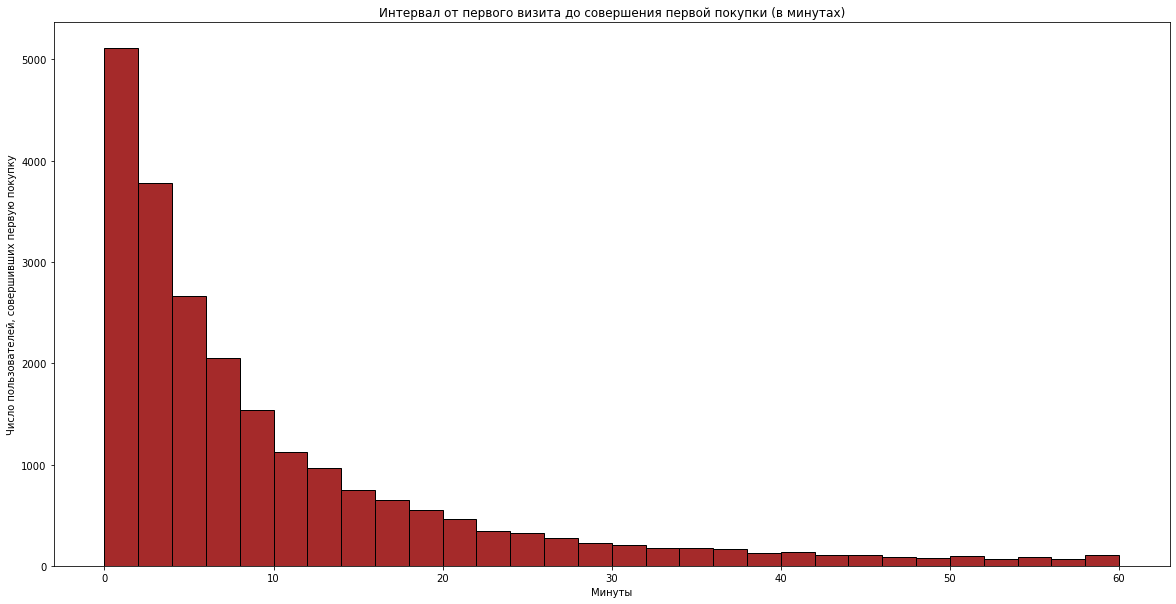

In [79]:
# Выводим гистограмму по временному срезу
fp_time_hist.plot(kind='hist', bins=30, figsize=(20,10), color='brown', ec='black', legend=False)
plt.title('Интервал от первого визита до совершения первой покупки (в минутах)')
plt.xlabel ('Минуты')
plt.ylabel ('Число пользователей, совершивших первую покупку')
plt.show()

### Промежуточные выводы:
- Медиана разницы по времени с момента первого визита до момента совершения первой покупки - 16 минут.
- Гистограмма показывает, что большинство пользователей совершает первую покупку в течение первых двух минут после посещения ресурса.

### Рассчет  среднего количества покупок на одного покупателя за определённый период (шесть месяцев)

In [80]:
# Выводим фрейм in_order
in_order.head(5)

,uid,in_purchase_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [81]:
# Добавляем столбцы по годам, месяцам, неделям и датам
in_order['in_year']  = in_order['in_purchase_date'].dt.year
in_order['in_month'] = in_order['in_purchase_date'].dt.month
in_order['in_week']  = in_order['in_purchase_date'].dt.week
in_order['in_date'] = in_order['in_purchase_date'].dt.date

In [82]:
# Проверяем результат
in_order.sample(10)

,uid,in_purchase_date,in_year,in_month,in_week,in_date
26467,13371809646458108946,2018-05-15 11:59:00,2018,5,20,2018-05-15
32384,16351407453946259786,2018-02-21 20:21:00,2018,2,8,2018-02-21
5005,2533570982362194729,2017-09-25 12:07:00,2017,9,39,2017-09-25
25483,12871927729188003330,2018-05-04 18:57:00,2018,5,18,2018-05-04
31322,15801503858171374658,2017-09-24 14:26:00,2017,9,38,2017-09-24
27256,13766401185205325933,2017-07-26 11:58:00,2017,7,30,2017-07-26
23041,11637272426511738024,2017-12-06 20:20:00,2017,12,49,2017-12-06
7810,3941539553994414919,2017-10-25 11:49:00,2017,10,43,2017-10-25
29324,14791354272948789825,2017-11-24 11:42:00,2017,11,47,2017-11-24
16165,8106217346261971559,2018-05-23 10:46:00,2018,5,21,2018-05-23


In [83]:
# Создаем новый датасет с группировакой по году и месяцу
in_order_month = in_order.groupby(['in_year','in_month']).agg({'uid':'count'})

In [84]:
# Выводим результат
in_order_month.sample(10)

uid
in_year in_month      
2017    9         2581
2018    4         2276
2017    8         1370
        6         2023
        7         1923
2018    2         3651
2017    10        4340
        11        4081
2018    1         3373
        6            1

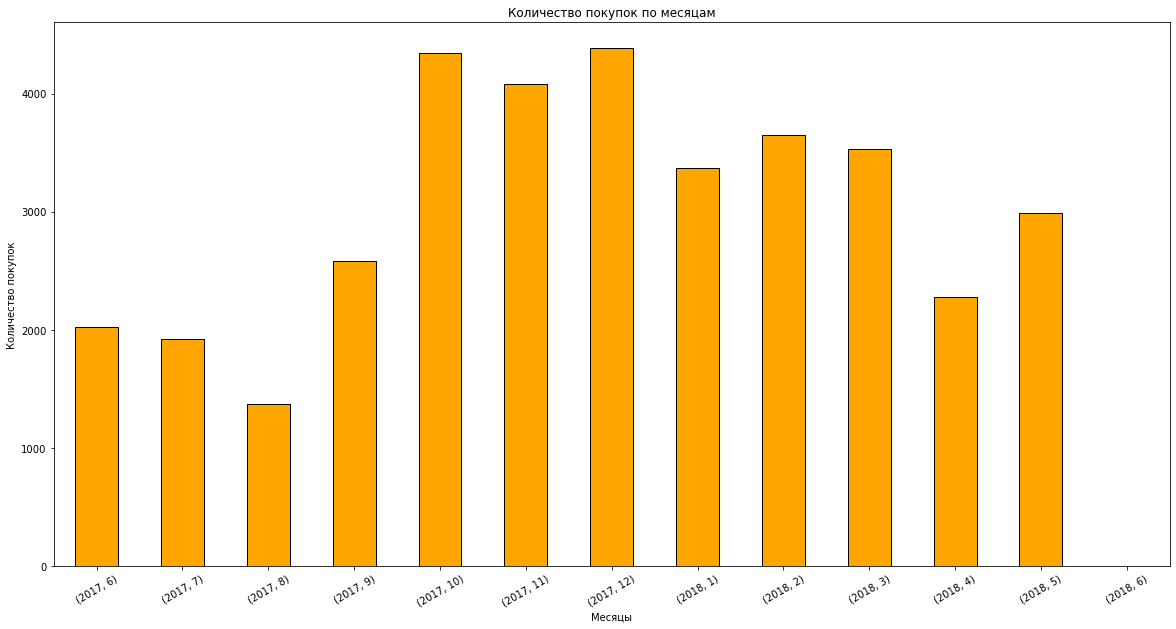

In [85]:
# Выводим график покупок по месяцам
ax=in_order_month.plot(kind='bar', figsize=(20, 10), color='orange', ec='black', legend=False)
plt.title('Количество покупок по месяцам')
plt.xticks(rotation=30)
plt.xlabel('Месяцы')
plt.ylabel('Количество покупок')
plt.show()

In [86]:
# Формируем срез по шести месяцам
in_order_six = in_order[in_order['in_month'] >= 6]

In [87]:
# Выводим результат
in_order_six.sample(10)

,uid,in_purchase_date,in_year,in_month,in_week,in_date
1,1575281904278712,2017-06-03 10:13:00,2017,6,22,2017-06-03
25247,12754458253725881731,2017-09-20 10:47:00,2017,9,38,2017-09-20
2965,1504714977115109087,2017-08-30 21:55:00,2017,8,35,2017-08-30
17908,9060023672536795684,2017-11-18 08:30:00,2017,11,46,2017-11-18
1701,857402498372082840,2017-11-24 23:50:00,2017,11,47,2017-11-24
32374,16348028524764529127,2017-09-22 10:02:00,2017,9,38,2017-09-22
5024,2548379397372033899,2017-10-21 11:32:00,2017,10,42,2017-10-21
28601,14429120231594347430,2017-10-31 10:46:00,2017,10,44,2017-10-31
11227,5635523827567093081,2017-07-03 14:42:00,2017,7,27,2017-07-03
15337,7696884165108349401,2017-12-12 15:57:00,2017,12,50,2017-12-12


In [88]:
# Находим число покупок одного клиента за заявленный интервал
one_client=in_order_six['uid'].count()/in_order_six['uid'].nunique()

In [89]:
# Выводим результат
print ('Количество покупок на одного клиента за шесть месяцев:', one_client)

Количество покупок на одного клиента за шесть месяцев: 1.0


### Промежуточные выводы:
- В октябре, ноябре и декабре количество покупок равно или превышает 4 тысячи.
- В июне, июле и августе количество покупок не превышает 2 тысяч в месяц.
- Уникальный клиент сервиса в среднем совершает одну покупку за пол-года. Это - незначительная величина особенно с учетом того, что количество уникальных пользователей сервиса, согласно датасету orders чуть больше 50 тысяч.

### Рассчет среднего чека методом группировки по времени совершения покупки

In [90]:
# Объединяем два датасета методом .merge()
orders_in_visit=orders.merge(in_visit)

In [91]:
# Выводим результат
orders_in_visit.sample(5)

,uid,revenue,purchase_ts,in_visit_date
37722,6747456691642029731,2.75,2018-02-14 11:32:00,2017-08-01 16:19:00
30608,1262264356011568218,1.59,2017-12-28 20:52:00,2017-12-28 20:20:00
45926,16813744659982760810,4.67,2018-04-18 20:23:00,2018-04-18 20:12:00
22385,9943570620826423307,4.28,2017-11-20 10:56:00,2017-11-20 10:49:00
20706,7205818013333757169,1.22,2018-03-07 17:35:00,2017-11-09 17:21:00


In [92]:
# Формируем новые столбцы методом .dt.
orders_in_visit['purchase_date']=orders_in_visit['purchase_ts'].dt.date
orders_in_visit['purchase_week']=orders_in_visit['purchase_ts'].dt.week
orders_in_visit['purchase_month']=orders_in_visit['purchase_ts'].dt.month
orders_in_visit['purchase_year']=orders_in_visit['purchase_ts'].dt.year

In [93]:
# Выводим результат
orders_in_visit.sample(5)

,uid,revenue,purchase_ts,in_visit_date,purchase_date,purchase_week,purchase_month,purchase_year
18286,66121905228879634,0.61,2017-10-25 14:00:00,2017-10-25 13:32:00,2017-10-25,43,10,2017
20442,4545723874385297439,0.55,2017-11-07 23:22:00,2017-11-07 23:14:00,2017-11-07,45,11,2017
5690,6853820180456171909,24.44,2017-09-01 09:14:00,2017-06-05 18:04:00,2017-09-01,35,9,2017
30694,4193622823165841549,0.98,2017-12-29 12:05:00,2017-12-29 12:01:00,2017-12-29,52,12,2017
41503,12719030548765004909,0.61,2018-03-10 09:37:00,2018-03-10 09:34:00,2018-03-10,10,3,2018


In [94]:
# Группируем и рассчитываем среднее значение
purchase_mean=orders_in_visit.groupby('purchase_month').agg({'revenue':'mean'})

In [95]:
# Добавляем группировку по году и месяцу
purchase_mean_1=orders_in_visit.groupby(['purchase_year', 'purchase_month'])['revenue'].mean()

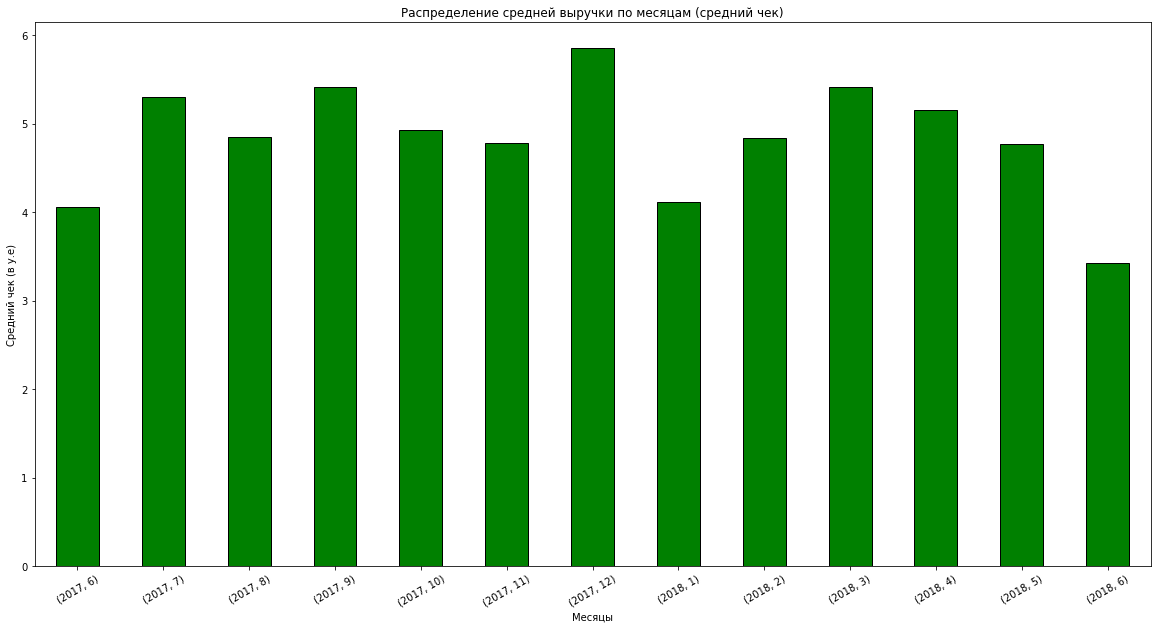

In [96]:
# Выводим график
purchase_mean_1.plot(kind='bar', figsize=(20, 10), color='green', ec='black', legend=False)
plt.title('Распределение средней выручки по месяцам (средний чек)')
plt.xlabel('Месяцы')
plt.xticks(rotation=30)
plt.ylabel('Средний чек (в у.е)')
plt.show()

In [97]:
# Находим значение моды
orders_in_visit['revenue'].mode()

0    1.83
dtype: float64

### Промежуточные выводы:
- Средняя стоимость заказа по месяцам колеблется от 3,8 до 5,8 условных единиц.
- Мода по данному показателю - 1,83.

### Рассчет LTV покупателя по когортам

In [98]:
# Выводим анализ столбца 'purchase_ts' методом .describe()
orders['purchase_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: purchase_ts, dtype: object

In [99]:
# Создаем новый столбец 'order_month'
# Используем метод datetime64[M] 
orders['order_month'] = orders['purchase_ts'].astype('datetime64[M]')

In [100]:
# Создаем новую таблицу
# Сбрасываем индекс
# Выводим необходимые столбцы
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

In [101]:
# Выводим результат
first_orders.sample(5) 

,uid,first_order_month
21468,10847979368745978611,2017-10-01
20662,10436457472806358878,2017-07-01
16455,8254836471278487950,2017-09-01
6122,3094487082667049005,2017-10-01
20220,10222628295252157810,2018-04-01


In [102]:
# Формируем новую таблицу
# Сбрасываем индекс
# Выводим нужные столбцы
cohort_sizes = (first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [103]:
# Выводим результат
cohort_sizes.sample(5)

,first_order_month,n_buyers
0,2017-06-01,2023
8,2018-02-01,3651
1,2017-07-01,1923
7,2018-01-01,3373
12,2018-06-01,1


In [104]:
# Создаем новую таблицу методом .merge()
orders_new = pd.merge(orders,first_orders, on='uid')

In [105]:
# Выводим результат
orders_new.sample(5)

,uid,revenue,purchase_ts,order_month,first_order_month
10412,4675229597522933735,1.94,2017-09-08 17:11:00,2017-09-01,2017-09-01
26494,18175654520986252484,7.94,2017-12-07 12:04:00,2017-12-01,2017-12-01
39270,4834297808776303745,1.47,2018-02-23 10:55:00,2018-02-01,2018-02-01
39218,18055421738943097730,5.13,2018-02-22 20:08:00,2018-02-01,2018-02-01
11718,5539673724080479777,23.83,2017-11-27 16:40:00,2017-11-01,2017-09-01


In [106]:
# Формируем когорты
cohorts = (orders_new.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())

In [107]:
# Выводим результат
cohorts.sample(5)

,first_order_month,order_month,revenue
41,2017-09-01,2018-05-01,474.92
34,2017-09-01,2017-10-01,2884.49
27,2017-08-01,2017-12-01,676.85
11,2017-06-01,2018-05-01,519.62
70,2018-02-01,2018-04-01,286.66


In [108]:
# Создаем таблицу report
report = pd.merge(cohort_sizes, cohorts, on='first_order_month') 

In [109]:
# Выводим результат
report.sample(5)

,first_order_month,n_buyers,order_month,revenue
5,2017-06-01,2023,2017-11-01,1487.92
65,2018-01-01,3373,2018-03-01,1026.34
23,2017-08-01,1370,2017-08-01,7228.83
47,2017-10-01,4340,2018-03-01,522.37
42,2017-10-01,4340,2017-10-01,21716.20


In [110]:
# Маржинальность сервиса по условию - 100%
# Рассчитываем gp (gross profit)
# Рассчитываем возраст когорты (age)

margin_rate = 1.0

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [111]:
# Выводим результат
report.sample(5)

,first_order_month,n_buyers,order_month,revenue,gp,age
17,2017-07-01,1923,2017-12-01,300.08,300.08,5
43,2017-10-01,4340,2017-11-01,2325.21,2325.21,1
66,2018-01-01,3373,2018-04-01,481.59,481.59,3
53,2017-11-01,4081,2018-02-01,1326.13,1326.13,3
45,2017-10-01,4340,2018-01-01,682.01,682.01,3


In [112]:
# Рассчитываем LTV
# Выводим значения в виде сводной таблицы
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean')

output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.40,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.92,6.99,7.30,7.64,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.88,4.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.51,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# Применяем функицю .loc для выборки по средним значениям
output.loc['mean'] = output.mean()

In [114]:
# Сохраняем cumsum() в переменную снова
output=output.cumsum(axis=1).round(2)

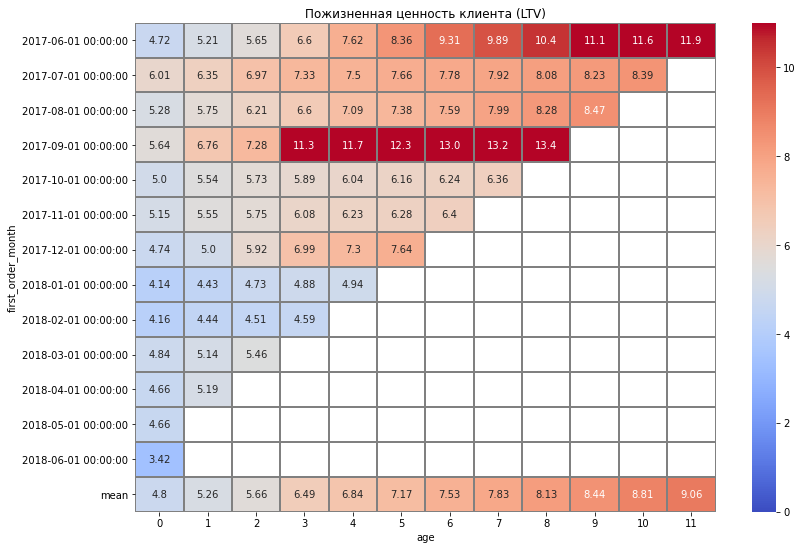

In [115]:
# Создаем тепловую карту
plt.figure(figsize=(13, 9))
plt.title('Пожизненная ценность клиента (LTV)')
ax=sns.heatmap(output, annot=True, fmt='.3', linewidths=1, linecolor='grey',cmap='coolwarm', vmin=0, vmax=11)
plt.show()

In [116]:
# Создаем срез по когортам с lifetime больше полугода
six_months_ltv=report[(report['age']>=6)]

In [117]:
# Рассчитываем средний LTV для когорт, возрастом более полугода
ltv_sum=six_months_ltv.pivot_table(index='first_order_month', values='ltv', aggfunc='sum').round()
ltv_sum.mean()

ltv    1.166667
dtype: float64

### Промежуточные выводы:
- Средний показатель LTV клиента по когортам возрастом от полугода - 1.2 у.е.

___

### Рассчет маркетинговых метрик

### Рассчет общей суммы расходов на маркетинг/ Распределение расходов по источникам/Распределение расходов по времени (по месяцам)

In [118]:
# Рассчитываем общую сумму расходов на маркетинг
total=costs['costs'].sum()

In [119]:
# Выводим результат
print('Общая сумма расходов на маркетинг:', total)

Общая сумма расходов на маркетинг: 329131.62


In [120]:
# Рассчитываем затраты на маркетинг по источникам
total_by_source=costs.groupby('source_id').agg({'costs':'sum'})

In [121]:
# Выводим результат
total_by_source.sample(7)

,costs
source_id,
5,51757.10
1,20833.27
2,42806.04
3,141321.63
9,5517.49
4,61073.60
10,5822.49


In [122]:
# Рассчитываем расходы по времени
# Формируем новый столбец методом datetime64[M]
costs['month_of_costs'] = costs['date'].astype('datetime64[M]').dt.date

In [123]:
# Создаем новую таблицу 
costs_by_month=costs.groupby('month_of_costs')['costs'].sum().reset_index()

In [124]:
# Выводим результат
costs_by_month.sample(10)

,month_of_costs,costs
8,2018-02-01,32723.03
4,2017-10-01,36322.88
1,2017-07-01,18240.59
9,2018-03-01,30415.27
0,2017-06-01,18015.00
10,2018-04-01,22289.38
11,2018-05-01,22224.27
3,2017-09-01,24368.91
7,2018-01-01,33518.52
2,2017-08-01,14790.54


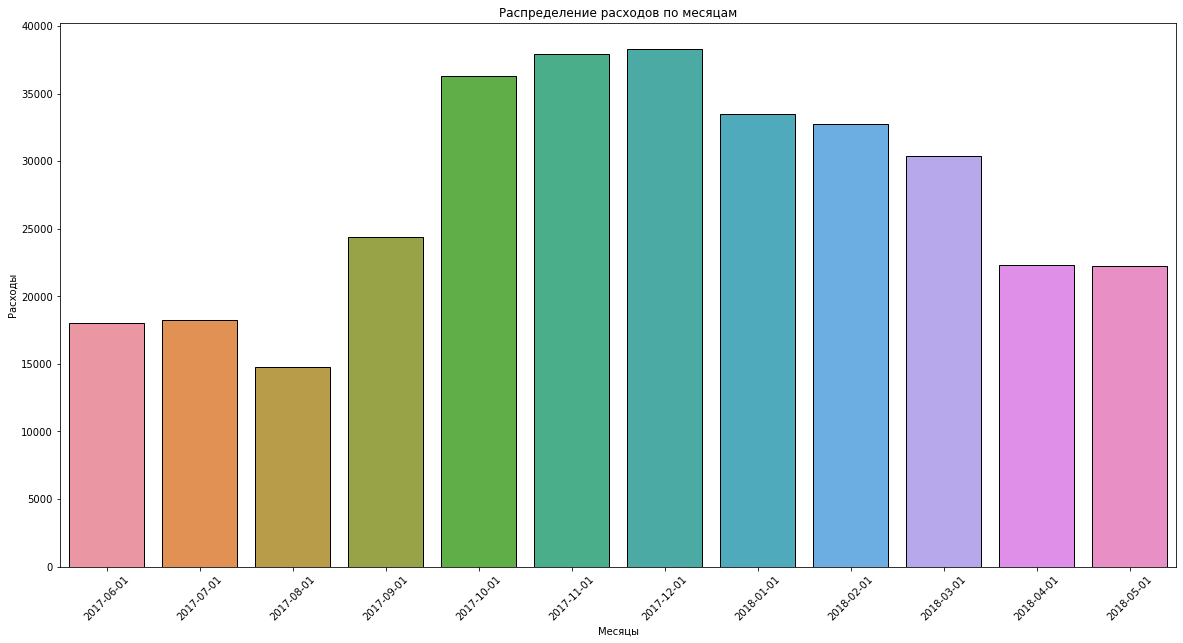

In [125]:
# Формируем гистограмму
plt.figure(figsize = (20, 10))
ax = sns.barplot(x='month_of_costs', y='costs', data=costs_by_month, ec='black')
plt.xticks(rotation=45)
plt.title('Распределение расходов по месяцам')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Расходы')
plt.show()

### Промежуточные выводы:
- Общие расходы на маркетинг составляют 329131.62 у.е.
- Наибольшие расходы на маркетинг приходятся на ноябрь и декабрь (новогодние праздники, предновогодние премьеры, детские елки).
- Самым "пустым" месяцем является август, когда и продажи минимальны, и, соответственно, расходы на маркетинг минимальны также.

### Рассчет средней стоимости привлечения клиента (CAC)

In [126]:
# Формируем новый датасет
# Группируем по столбцу 'source_id'
# Сбрасываем индекс
source_costs = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()

In [127]:
# Выводим результат
source_costs.sample(5)

,source_id,costs
2,3,141321.63
3,4,61073.60
5,9,5517.49
0,1,20833.27
4,5,51757.10


In [128]:
# Формируем датасет; делаем срез по 'start_ts'
# Создаем новую таблицу методом .merge
# Сбрасываем индекс
source_visits = visits.query('start_ts == first_start_ts')
source_customers = (orders.merge(source_visits, on='uid', how='inner')).\
groupby('source_id').agg({'uid':'nunique'}).rename(columns={'uid':'customers'}).reset_index()

In [129]:
# Выводим результат
source_customers.sample(8)

,source_id,customers
5,7,1
7,10,1329
4,5,6931
3,4,10296
0,1,2899
6,9,1088
1,2,3506
2,3,10473


In [130]:
# Формируем таблицу методом .merge()
cac = source_customers.merge(source_costs, on='source_id', how='left')

In [131]:
# Выводим результат
cac.sample(8)

,source_id,customers,costs
0,1,2899,20833.27
2,3,10473,141321.63
6,9,1088,5517.49
5,7,1,NaN
1,2,3506,42806.04
4,5,6931,51757.10
7,10,1329,5822.49
3,4,10296,61073.60


In [132]:
# Используем .fillna () для заполнения
# Рассчитываем cac
# Сортируем данные по убыванию
cac = cac.fillna(0)
cac['cac'] = cac['costs'] / cac['customers']
cac.sort_values('cac', ascending = False)

,source_id,customers,costs,cac
2,3,10473,141321.63,13.493901
1,2,3506,42806.04,12.209367
4,5,6931,51757.10,7.467479
0,1,2899,20833.27,7.186364
3,4,10296,61073.60,5.931779
6,9,1088,5517.49,5.071222
7,10,1329,5822.49,4.381106
5,7,1,0.00,0.000000


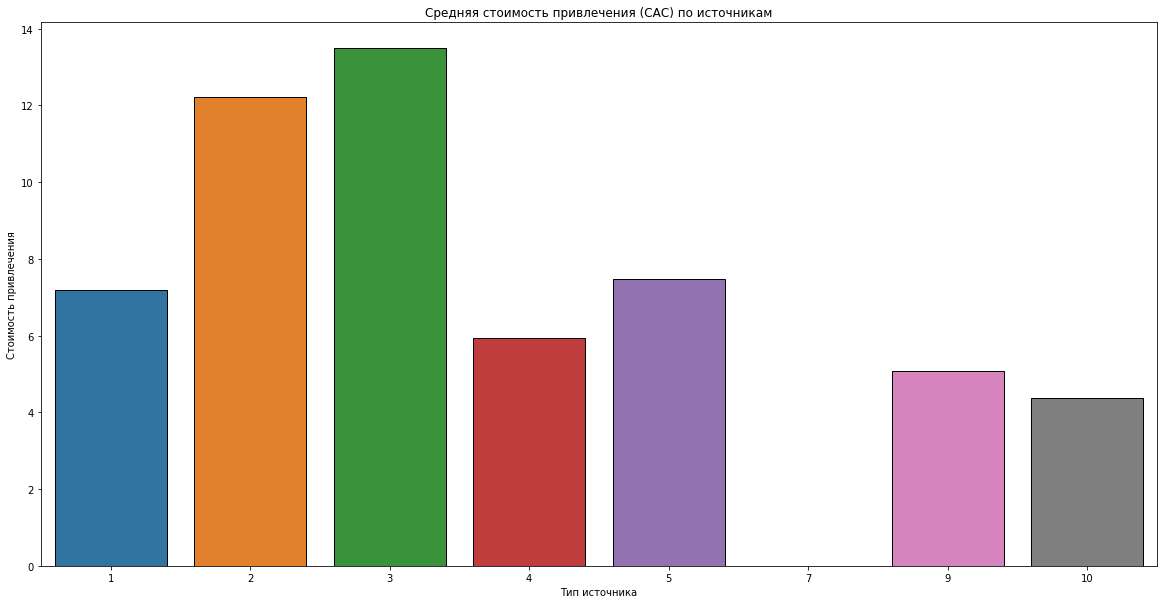

In [133]:
# Выводим график CAC по источнику
plt.figure(figsize = (20, 10))
ax = sns.barplot(x='source_id', y='cac', data=cac, ec='black')
plt.title('Средняя стоимость привлечения (САС) по источникам')
ax.set_xlabel('Тип источника')
ax.set_ylabel('Стоимость привлечения')
plt.show()

In [134]:
# Рассчитываем средний CAC по всему проекту
cac['cac'].mean()

6.967652477183084

### Промежуточные выводы:
- Максимальные значения CAC (по источникам) демонстрируют источники №3 и №2.
- По источнику №7 данные отсуствуют.
- Источники №6 и №8 не фигурируют в исследовании.
- Средняя CAC для всего проекта - около 7 у.е.

### Рассчет ROMI

In [135]:
# Формируем таблицу по источникам
# Сбрасываем индекс
sources = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first'}).reset_index()

In [136]:
# Выводим результат
sources.head(5)

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [137]:
# Формируем новую таблицу по покупателям
# Сбрасываем индекс
clients=orders.groupby('uid').agg({'purchase_ts':'min'}).reset_index()

In [138]:
# Выводим результат
clients.head(5)

,uid,purchase_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [139]:
# Объединяем таблицы методом .merge()
# Переименовываем столбец purchase_ts
clients=clients.merge(sources, on='uid').reset_index()
clients=clients.rename(columns={'purchase_ts':'first_buying'})

In [140]:
# Выводим результат
clients.sample(5)

,index,uid,first_buying,source_id
2654,2654,1364685779935562544,2017-09-12 22:17:00,2
12600,12600,6296115483455392537,2017-10-06 12:21:00,10
14101,14101,7083047557018310573,2018-02-14 09:23:00,1
23529,23529,11881852717976148065,2017-06-07 09:57:00,3
28026,28026,14166401377481278800,2018-02-16 15:36:00,1


In [141]:
# Формируем новую таблицу
# Рассчитываем промежуток времени между первыми покупками
ltv=clients.merge(orders, on='uid')
ltv['lifetime'] = ((ltv['purchase_ts'] - ltv['first_buying']) / np.timedelta64(1,'M')).round().astype(int)

In [142]:
# Выводим результат
ltv.sample(5)

,index,uid,first_buying,source_id,revenue,purchase_ts,order_month,lifetime
4209,3071,1562288748157374819,2018-04-25 16:59:00,5,3.50,2018-04-25 16:59:00,2018-04-01,0
8716,6433,3245147755525106696,2018-04-13 21:56:00,3,2.14,2018-04-13 21:56:00,2018-04-01,0
48854,35436,17889728163188637135,2017-06-23 16:04:00,3,3.05,2017-06-23 16:04:00,2017-06-01,0
40442,28867,14572253146043609962,2017-06-06 13:21:00,3,1.22,2017-10-06 20:45:00,2017-10-01,4
28861,20500,10363944041103010333,2017-12-01 16:18:00,5,1.47,2017-12-01 16:18:00,2017-12-01,0


In [143]:
# Формируем очередную сводную таблицу с данными по суме доходов за lifetime из определенного источника
report_ltv=ltv.groupby(['lifetime','source_id']).agg({'uid':'nunique', 'revenue':'sum'}).reset_index()

In [144]:
# Выводим необходимые столбцы
report_ltv.columns=['lifetime', 'source_id', 'n_buyers', 'revenue']
report_ltv.sample(5)

,lifetime,source_id,n_buyers,revenue
38,5,3,86,413.65
48,6,9,23,134.41
85,12,4,5,13.44
4,0,5,6931,34030.40
45,6,3,87,255.68


In [145]:
# Посчитаем количество покупателей, пришедших из одного источника (за все время)
report_ltv_total_buyers = report_ltv.groupby('source_id').agg({'n_buyers':'sum'}).reset_index()
report_ltv_total_buyers.columns = ['source_id', 'n_buyers_total']

In [146]:
# Выводим результат
report_ltv_total_buyers.sample(5)

,source_id,n_buyers_total
5,7,1
1,2,4228
3,4,11308
6,9,1375
4,5,7587


In [147]:
# Добавляем в таблицу report_ltv столбец 'gp' (gross profit)
# По условию, доходность равна 100% (1)
margin_rate = 1
report_ltv['gp']=report_ltv['revenue']* margin_rate

In [148]:
# Выводим результат
report_ltv.sample(10)

,lifetime,source_id,n_buyers,revenue,gp
77,11,1,10,336.13,336.13
50,7,1,33,988.65,988.65
38,5,3,86,413.65,413.65
49,6,10,7,17.95,17.95
35,4,10,6,18.63,18.63
3,0,4,10296,47204.71,47204.71
84,12,3,8,11.49,11.49
18,2,4,189,1175.28,1175.28
66,9,3,14,53.66,53.66
59,8,3,45,195.68,195.68


In [149]:
# Объединим таблицы report_ltv и report_ltv_total_buyers
report_ltv=pd.merge(report_ltv, report_ltv_total_buyers, on='source_id')

In [150]:
# Выводим результат
report_ltv.sample(10)

,lifetime,source_id,n_buyers,revenue,gp,n_buyers_total
54,2,5,124,2465.93,2465.93,7587
59,7,5,34,622.37,622.37,7587
37,11,3,8,11.88,11.88,11568
67,1,9,68,311.70,311.70,1375
18,5,2,75,2048.43,2048.43,4228
5,5,1,39,642.94,642.94,3402
63,11,5,6,66.24,66.24,7587
36,10,3,15,54.69,54.69,11568
81,4,10,6,18.63,18.63,1411
24,11,2,9,117.20,117.20,4228


In [151]:
# Добавляем столбец со средней суммой, которую приносит клиент со всех своих покупок
report_ltv['ltv'] = report_ltv['gp'] / report_ltv['n_buyers_total']

In [152]:
# Формируем итоговую таблицу методом .pivot_table()
# Используем функцию cumsum() для подсчета суммы элементов множества, поскольку LTV - накопительная метрика
final_ltv=report_ltv.pivot_table(index = 'source_id', columns = 'lifetime', values='ltv', aggfunc='mean')
final_ltv = final_ltv.cumsum(axis=1).round(2)

In [153]:
# Выводим результат
final_ltv.head(8)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,5.25,6.09,6.72,7.28,7.69,7.88,8.12,8.41,8.68,8.91,9.00,9.10,9.14
2,5.61,6.68,8.06,9.33,9.87,10.35,10.55,10.74,10.92,10.97,11.07,11.10,11.10
3,4.05,4.28,4.41,4.53,4.60,4.64,4.66,4.68,4.70,4.71,4.71,4.71,4.71
4,4.17,4.31,4.42,4.51,4.61,4.76,4.86,4.91,4.93,4.96,5.01,5.01,5.01
5,4.49,4.67,5.00,6.25,6.46,6.62,6.73,6.81,6.87,6.92,6.93,6.94,6.94
7,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3.07,3.30,3.49,3.70,3.79,3.91,4.00,4.06,4.15,4.18,4.19,NaN,NaN
10,2.98,3.04,3.07,3.11,3.12,3.13,3.14,3.15,3.15,3.15,NaN,NaN,NaN


In [154]:
# Теперь рассчитываем CAC
# Сначала сгруппируем датасет costs по источникам и сумме полученного дохода
source_id_costs = costs.groupby('source_id').sum()

In [155]:
# Выводим результат
source_id_costs.sample(7)

,costs
source_id,
4,61073.60
2,42806.04
1,20833.27
9,5517.49
10,5822.49
5,51757.10
3,141321.63


In [156]:
# Объединяем таблицы
# Рассчитываем CAC
report_cac = pd.merge(report_ltv, source_id_costs, on=['source_id'])
report_cac['cac'] = report_cac['costs'] / report_cac['n_buyers_total']

In [157]:
# Выводим результат
report_cac.sample(8)

,lifetime,source_id,n_buyers,revenue,gp,n_buyers_total,ltv,costs,cac
50,11,4,7,28.34,28.34,11308,0.002506,61073.60,5.400920
82,6,10,7,17.95,17.95,1411,0.012721,5822.49,4.126499
54,2,5,124,2465.93,2465.93,7587,0.325020,51757.10,6.821814
70,5,9,27,160.37,160.37,1375,0.116633,5517.49,4.012720
45,6,4,79,1192.28,1192.28,11308,0.105437,61073.60,5.400920
4,4,1,57,1425.00,1425.00,3402,0.418871,20833.27,6.123830
32,6,3,87,255.68,255.68,11568,0.022102,141321.63,12.216600
77,1,10,26,84.13,84.13,1411,0.059624,5822.49,4.126499


In [158]:
# Формируем итоговую таблицу методом pivot_table()
# Используем функцию cumsum()
final_cac = report_cac.pivot_table(index = 'source_id', columns = 'lifetime', values='cac', aggfunc='mean')

In [159]:
# Выводим результат
final_cac.sample(7)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
10,4.126499,4.126499,4.126499,4.126499,4.126499,4.126499,4.126499,4.126499,4.126499,4.126499,NaN,NaN,NaN
5,6.821814,6.821814,6.821814,6.821814,6.821814,6.821814,6.821814,6.821814,6.821814,6.821814,6.821814,6.821814,6.821814
4,5.400920,5.400920,5.400920,5.400920,5.400920,5.400920,5.400920,5.400920,5.400920,5.400920,5.400920,5.400920,5.400920
3,12.216600,12.216600,12.216600,12.216600,12.216600,12.216600,12.216600,12.216600,12.216600,12.216600,12.216600,12.216600,12.216600
1,6.123830,6.123830,6.123830,6.123830,6.123830,6.123830,6.123830,6.123830,6.123830,6.123830,6.123830,6.123830,6.123830
2,10.124418,10.124418,10.124418,10.124418,10.124418,10.124418,10.124418,10.124418,10.124418,10.124418,10.124418,10.124418,10.124418
9,4.012720,4.012720,4.012720,4.012720,4.012720,4.012720,4.012720,4.012720,4.012720,4.012720,4.012720,NaN,NaN


In [160]:
# Теперь можно подсчитать ROMI по формуле LTV/CAC
report_cac['romi'] = report_cac['ltv'] / report_cac['cac']

In [161]:
# Выводим результат
report_cac.sample(7)

,lifetime,source_id,n_buyers,revenue,gp,n_buyers_total,ltv,costs,cac,romi
20,7,2,36,795.73,795.73,4228,0.188205,42806.04,10.124418,0.018589
23,10,2,18,397.70,397.70,4228,0.094063,42806.04,10.124418,0.009291
69,4,9,37,118.92,118.92,1375,0.086487,5517.49,4.012720,0.021553
15,2,2,132,5831.11,5831.11,4228,1.379165,42806.04,10.124418,0.136222
19,6,2,55,831.02,831.02,4228,0.196552,42806.04,10.124418,0.019414
1,1,1,110,2883.49,2883.49,3402,0.847587,20833.27,6.123830,0.138408
16,3,2,99,5384.22,5384.22,4228,1.273467,42806.04,10.124418,0.125782


In [162]:
# Формируем итоговую таблицу методом pivot_table()
# Используем функцию cumsum()
final_romi = report_cac.pivot_table(index = 'source_id', columns = 'lifetime', values='romi', aggfunc='mean')
final_romi=final_romi.cumsum(axis=1).round(2)

In [163]:
# Выводим результат
final_romi.sample(7)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
9,0.77,0.82,0.87,0.92,0.94,0.97,1.00,1.01,1.03,1.04,1.04,NaN,NaN
5,0.66,0.68,0.73,0.92,0.95,0.97,0.99,1.00,1.01,1.01,1.02,1.02,1.02
4,0.77,0.80,0.82,0.83,0.85,0.88,0.90,0.91,0.91,0.92,0.93,0.93,0.93
1,0.86,1.00,1.10,1.19,1.26,1.29,1.33,1.37,1.42,1.45,1.47,1.49,1.49
10,0.72,0.74,0.74,0.75,0.76,0.76,0.76,0.76,0.76,0.76,NaN,NaN,NaN
3,0.33,0.35,0.36,0.37,0.38,0.38,0.38,0.38,0.38,0.39,0.39,0.39,0.39
2,0.55,0.66,0.80,0.92,0.97,1.02,1.04,1.06,1.08,1.08,1.09,1.10,1.10


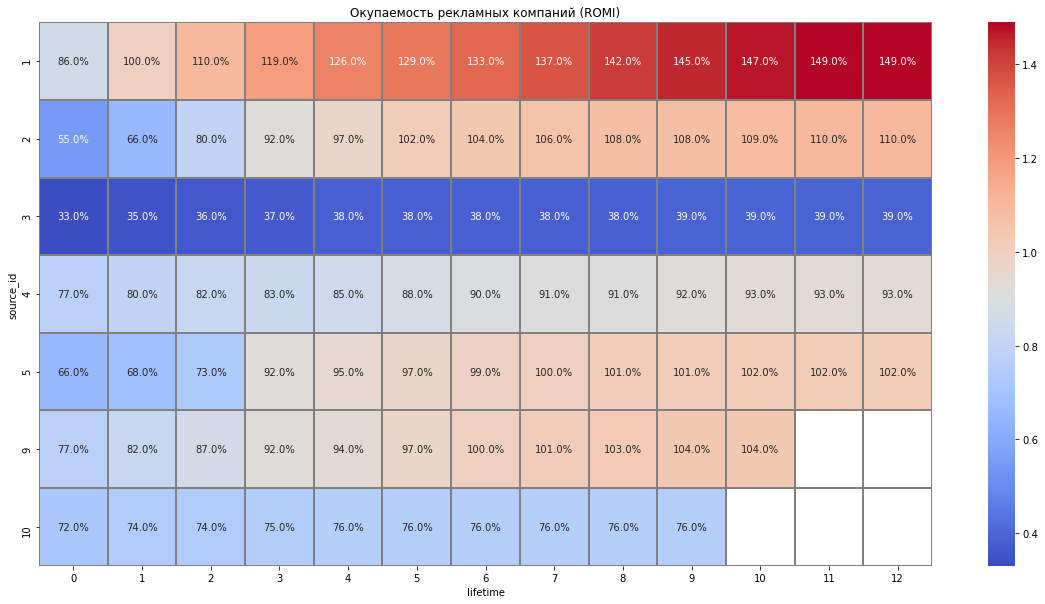

In [164]:
# Выводим тепловую карту ROMI
plt.figure(figsize=(20, 10))
plt.title('Окупаемость рекламных компаний (ROMI)')
ax=sns.heatmap(final_romi, annot=True, fmt='.1%', linewidths=1, linecolor='grey',cmap='coolwarm',)
plt.show()

In [165]:
# Выведем средние значения ROMI по "продолжительности жизни"
final_romi.mean()

lifetime
0     0.665714
1     0.721429
2     0.774286
3     0.842857
4     0.872857
5     0.895714
6     0.914286
7     0.927143
8     0.941429
9     0.950000
10    0.990000
11    0.986000
12    0.986000
dtype: float64

In [166]:
final_romi.loc['mean'] = final_romi.mean()

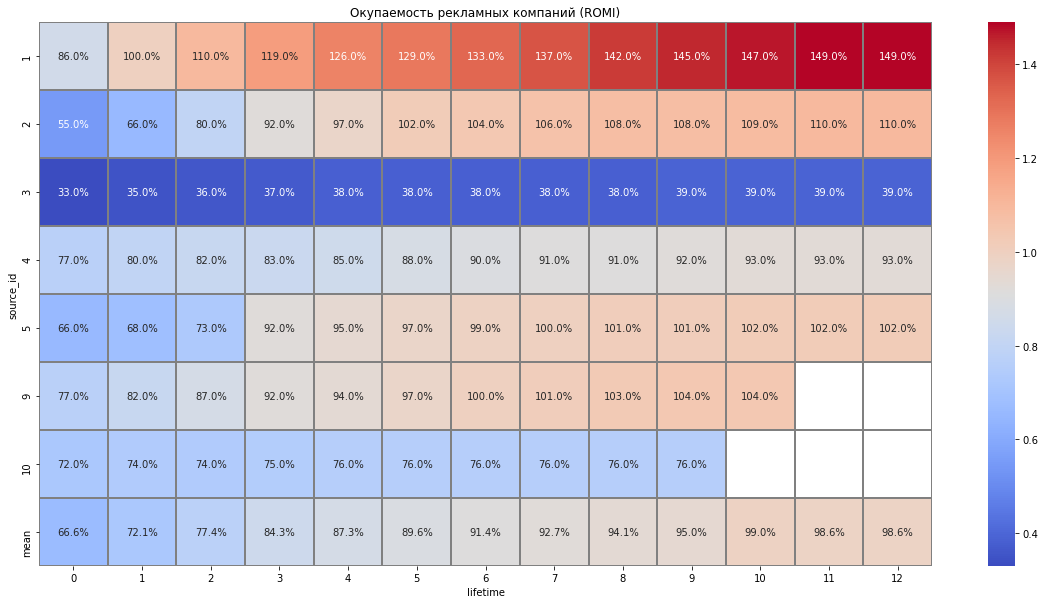

In [167]:
# Выводим тепловую карту ROMI
plt.figure(figsize=(20, 10))
plt.title('Окупаемость рекламных компаний (ROMI)')
ax=sns.heatmap(final_romi, annot=True, fmt='.1%', linewidths=1, linecolor='grey',cmap='coolwarm',)
plt.show()

### Рассчет ROI (рассчет, не предусмотренный заданием проекта)

In [168]:
# Формируем новую таблицу
# Группируем по столбцу 'source_id'
# Сбрасываем index
source_revenue = (orders.merge(source_visits, on='uid', how='inner')).groupby('source_id').agg({'revenue':'sum'})
source_revenue.reset_index()

,source_id,revenue
0,1,31090.55
1,2,46923.61
2,3,54511.24
3,4,56696.83
4,5,52624.02
5,7,1.22
6,9,5759.40
7,10,4450.33


In [169]:
# Создаем новую таблицу для ROI
roi=source_revenue.merge(source_costs, on='source_id')

In [170]:
# Рассчитываем ROI
roi['roi']=(roi['revenue']-roi['costs'])/ roi['costs']

In [171]:
# Выводим значения ROI по убыванию
roi.sort_values('roi', ascending=False)

,source_id,revenue,costs,roi
0,1,31090.55,20833.27,0.492351
1,2,46923.61,42806.04,0.096191
5,9,5759.40,5517.49,0.043844
4,5,52624.02,51757.10,0.016750
3,4,56696.83,61073.60,-0.071664
6,10,4450.33,5822.49,-0.235665
2,3,54511.24,141321.63,-0.614275


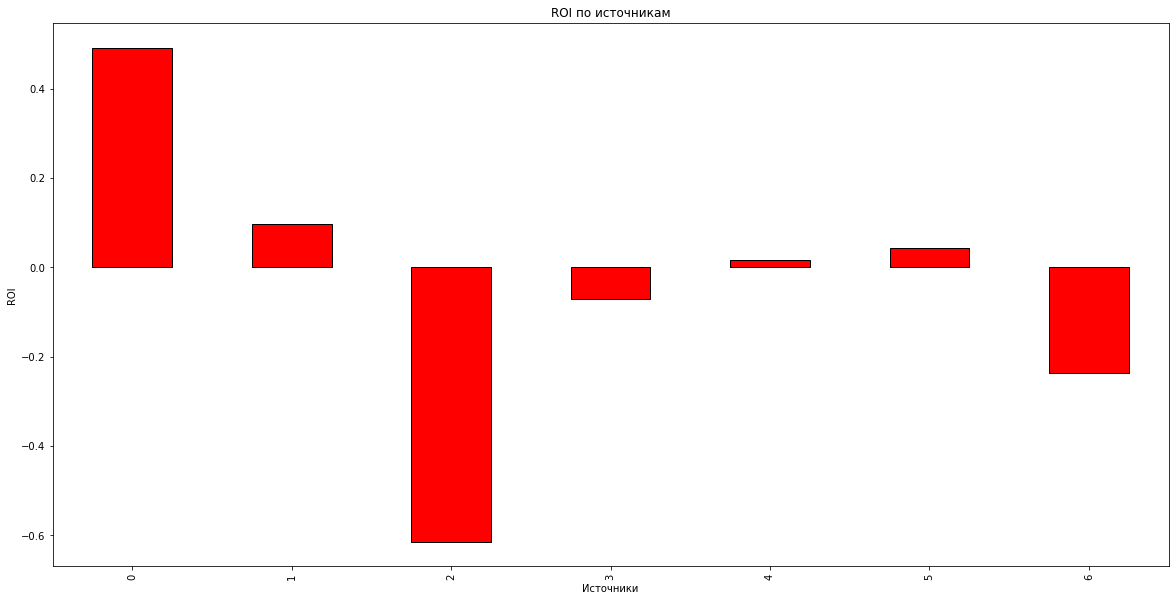

In [172]:
# Формируем гистограмму по ROI и источникам
roi['roi'].plot(kind='bar', figsize=(20, 10), color='red', ec='black', legend=False)
plt.title('ROI по источникам')
plt.xlabel ('Источники')
plt.ylabel ('ROI')
plt.show()

### Промежуточные выводы:
- Тепловая карта ROMI показывает, что сервис, начиная с 7 - 8 месяца близок к окупаемости по показателю ROMI (возврат на инвестиции в маркетинг), однако источники 3 и 10 (что бы это ни было) сильно портят общую картину. Видимо, актуальность их использования и инвестиции в них нужно пересмотреть самым существенным образом.
- Анализ ROI (возврат на инвестиции) показывает, что источники 3, 10 и 4 убыточны, а источник 1 приносит максимальную прибыль.

___

## Общие выводы и рекомендации:

### Общие выводы:
- Активность пользователей сервиса обладает ярко выраженной периодичностью: 1) люди пользуются ресурсом в среднем один раз в месяц, приобретая билеты ближе к концу текущего месяца. 2) максимальная активность пользователей наблюдается в ноябре и декабре, когда билеты приобретаются в качестве подарков, а также покупаются билеты на детские новогодние представления и на различные мероприятия в течение новогодних праздников. Кроме того, есть небольшой всплеск активности в конце февраля - начале марта(подарки к Международному женскому дню), в конце марта также повышается активность пользователей сервиса.  В конце мая - начале июня, а также в середине июля пользователи приобретают билеты на различные музыкальные фестивали. Таким образом, есть четкие сезонные колебания активности пользователей сервиса, выражающиеся в 3 - 4 очевидных всплесках (пиках на графиках активности).
- Данный проект нельзя назвать прибыльным: средний чек клиента - 5 у.е. при средней стоимости привлечения клиента порядка 7 у.е. При этом LTV - 0,3 у.е.
- По ROMI сервис близок к окупаемости, начиная с 7 - 8 месяца, однако источники 3 и 10 не позволяют выйти на окупаемость.
- Исходя из данных по ROI, можно сказать, что максимально прибыльным является источник 1, а вот источники 3,4 и 10 являются убыточными в большей или меньшей степени.

### Рекомендации:
- Поскольку сервис является агрегатором и зарабатывает, в том числе, на лояльности (удержании) клиентов, необходимо повышать Retention Rate, которая составляет, максимум 8,5% на второй месяц существования когорт: получается, что сервис (на данный момент) является "одноразовым".
- Маркетологам проекта следует также сосредоточиться на анализе эффективности источников: возможно от каких-то источников следует избавиться как от неэффективных, перенаправив бюджеты на более перспективные варианты привлечения клиентов. Анализ ROMI, например, показывает, что источник 3 не окупается. Анализ ROI показывает, что источники 3,4 и 10 убыточны в большей или меньшей степени.
- Отдельно стоит сосредоточится на летнем сезоне. в Сезон отпусков проводится большое количество самых разных метоприятий (концерты, фестивали, арт-проекты на открытом воздухе и т.д.). Возможно, стоит уделить этому обстоятельству особое внимание, предлагать некие скидки, например, и таким образом, не только привлекать новых клиентов, но и удерживать уже существующих, чтобы сократить до минимума "одноразовость" проекта как такового.